# Playground ImageNet

In [28]:
import argparse
import numpy as np
from PIL import Image
import pickle
from utils import *
import os
import matplotlib as mpl
mpl.use('Agg')

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

import numpy as np
import argparse
import math
import os
import torch
import torch.optim as optim
import torch.utils.data as data
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import torch.optim as optim
from tqdm import tqdm

In [63]:
###  NOW  IMAGENET64

def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo)
    return dict

def create_tuples(x,y, im_size):
    samps = []

    for i in np.arange(0,len(x),1):
        t = torch.Tensor(x[i]).view(3,im_size,im_size)
        tup = (t, int(y[i]))
        samps.append(tup)
    return samps
    


def load_data_train(input_file, im_size):

    d = unpickle(input_file)
    x = d['data']
    y = d['labels']
    mean_image = d['mean']

    x = np.divide(x,np.float32(255.0))
    mean_image = mean_image/np.float32(255.0)

    # Labels are indexed from 1, shift it so that indexes start at 0
    y = [i-1 for i in y]

    x -= mean_image

    img_size = im_size
    img_size2 = img_size * img_size

    x = np.dstack((x[:, :img_size2], x[:, img_size2:2*img_size2], x[:, 2*img_size2:]))
    x = x.reshape((x.shape[0], img_size, img_size, 3)).transpose(0, 3, 1, 2)

    return x, y

def load_data_test(input_file, im_size):

    d = unpickle(input_file)
    x = d['data']
    y = d['labels']

    x = np.divide(x,np.float32(255.0))

    # Labels are indexed from 1, shift it so that indexes start at 0
    y = [i-1 for i in y]

    img_size = im_size
    img_size2 = img_size * img_size

    x = np.dstack((x[:, :img_size2], x[:, img_size2:2*img_size2], x[:, 2*img_size2:]))
    x = x.reshape((x.shape[0], img_size, img_size, 3)) #.transpose(0, 3, 1, 2)

    return x, y

def get_train_dat(p, im_size):

    path = p
    counter = 0

    for i in os.listdir(path):
        counter += 1
        print(counter)
        total_path = path + i

        x,y = load_data_train(total_path, im_size)

        if counter == 1:
            x_train, y_train = x, y
            return x_train, y_train
        else:
            x_train = np.append(x_train, x, axis = 0)
            y_train = y_train + y
    return x_train, y_train

def get_test_dat(p, im_size):
    if im_size == 32:
        transform=transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize(
                mean=[0.485, 0.456, 0.406],  
                std=[0.229, 0.224, 0.225])
            ]
        )

    if im_size == 64:
        transform=transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize(
                mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225])
            ]
        )
    
    x_test, y_test = load_data_test(p, im_size)
    x_test = np.array([transform(i) for i in x_test])
    return x_test, y_test

def create_imnet_train_test(path_train, path_test, batch_size, im_size):
    x_train, y_train = get_train_dat(path_train, im_size)
    dat_train = create_tuples(x_train, y_train, im_size)
    trainset = torch.utils.data.DataLoader(dat_train, batch_size = batch_size, shuffle = False)

    x_test,y_test = get_test_dat(path_test, im_size)
    dat_test = create_tuples(x_test, y_test, im_size)
    testset = torch.utils.data.DataLoader(dat_test, batch_size = batch_size, shuffle = False)

    return trainset, testset

# 32 

In [64]:
path_train = '/Users/dj/Desktop/MT_Desktop/ImageNet/Imagenet32_train/'
path_test = '/Users/dj/Desktop/MT_Desktop/ImageNet/val_data'

trainset, testset = create_imnet_train_test(path_train= path_train,
                                             path_test=path_test,
                                                 batch_size = 128,
                                                  im_size = 32)

1


/opt/anaconda3/envs/MasterThesis/lib/python3.7/site-packages/ipykernel_launcher.py:101: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
/opt/anaconda3/envs/MasterThesis/lib/python3.7/site-packages/ipykernel_launcher.py:101: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.1956)
torch.Size([3, 32, 32])
841


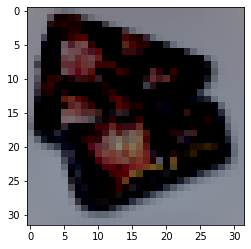

In [65]:
for idx, data in enumerate(trainset.dataset):
    if idx == 5:
        x,y = data
        print(torch.mean(x))
        print(x.shape)
        print(y)
        plt.imshow(x.permute(1, 2, 0))
        break

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(-0.0451)
torch.Size([3, 32, 32])
662
tensor([[[ 0.2967, -0.1999, -0.7822,  ..., -0.6109, -0.6794, -0.9192],
         [ 0.0741, -0.0116, -0.9020,  ..., -0.5938, -0.7308, -1.3302],
         [-0.8164,  0.0227, -1.0390,  ..., -0.6623, -0.8849, -1.1075],
         ...,
         [ 0.0569,  0.0398,  0.1083,  ..., -0.9877, -0.8678, -0.8507],
         [-0.3369,  0.1768,  0.0056,  ..., -0.6452, -0.8164, -0.8678],
         [-0.4911,  0.1597, -0.0458,  ..., -0.1657, -0.9020, -0.7993]],

        [[ 0.0301,  0.0301, -0.6352,  ..., -0.5126, -0.6001, -0.8102],
         [-0.2325,  0.2052, -0.7577,  ..., -0.4951, -0.6352, -1.1954],
         [-1.0028,  0.2402, -0.8978,  ..., -0.5651, -0.7577, -0.9328],
         ...,
         [-0.1975, -0.1450, -0.0749,  ..., -0.9678, -0.8102, -0.8277],
         [-0.4601, -0.0399, -0.1450,  ..., -0.6176, -0.8277, -0.8978],
         [-0.6877, -0.0749, -0.1975,  ..., -0.1450, -0.8277, -0.7752]],

        [[-0.6890, -0.0092, -0.5670,  ..., -0.4101, -0.4798, -0.6890],
 

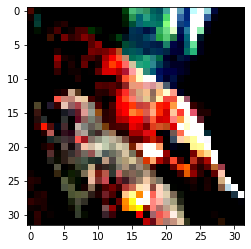

In [60]:
for idx, data in enumerate(testset.dataset):
    x,y = data
    if idx == 6:
        print(torch.mean(x))
        print(x.shape)
        print(y)
        print(x)
        plt.imshow(x.permute(1, 2, 0))
        break

# 32 from Pytorch

In [11]:
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim
import torch.utils.data
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models

import numpy as np
import pandas as pd
import torch
import torch.optim as optim
import torch.utils.data as data
from torchvision import datasets, transforms

In [14]:
# Data loading code
traindir = os.path.join('/Users/dj/Desktop/imnet_test', 'train')
valdir = os.path.join('/Users/dj/Desktop/imnet_test', 'val')

# traindir = '/Users/dj/Desktop/MT_Desktop/ImageNet/Imagenet32_train'
# valdir = '/Users/dj/Desktop/MT_Desktop/ImageNet/valdata'
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                    std=[0.229, 0.224, 0.225])

train_loader = torch.utils.data.DataLoader(
    datasets.ImageFolder(traindir, transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        normalize,
    ])),
    batch_size=128, shuffle=True,
    num_workers=1, pin_memory=True)

val_loader = torch.utils.data.DataLoader(
    datasets.ImageFolder(valdir, transforms.Compose([
        transforms.Scale(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        normalize,
    ])),
    batch_size=128, shuffle=False,
    num_workers=1, pin_memory=True)

FileNotFoundError: Couldn't find any class folder in /Users/dj/Desktop/imnet_test/train.

# 64

In [66]:
path_train = '/Users/dj/Desktop/MT_Desktop/ImageNet/ImageNet64/Imagenet64_train/'
path_test = '/Users/dj/Desktop/MT_Desktop/ImageNet/ImageNet64/val_data'

trainset, testset = create_imnet_train_test(path_train= path_train,
                                             path_test=path_test,
                                                 batch_size = 128,
                                                  im_size = 64)

1


/opt/anaconda3/envs/MasterThesis/lib/python3.7/site-packages/ipykernel_launcher.py:101: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
/opt/anaconda3/envs/MasterThesis/lib/python3.7/site-packages/ipykernel_launcher.py:101: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(-0.0418)
torch.Size([3, 64, 64])
1


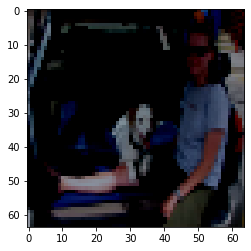

In [73]:
for idx, data in enumerate(trainset.dataset):
    if idx == 10:
        x,y = data
        print(torch.mean(x))
        print(x.shape)
        print(y)
        plt.imshow(x.permute(1, 2, 0))
        break

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(0.0172)
torch.Size([3, 64, 64])
371


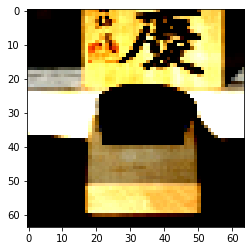

In [68]:
for idx, data in enumerate(testset.dataset):
    if idx == 0:
        x,y = data
        print(torch.mean(x))
        print(x.shape)
        print(y)
        plt.imshow(x.permute(1, 2, 0))
        break

# Gettin TEST data

In [8]:
x_test,y_test = load_data_test('/Users/dj/Desktop/MT_Desktop/ImageNet/val_data', im_size = 32)
print(type(x_test))
print(type(y_test))
dat_test = create_tuples(x_test, y_test, im_size = 32)
print(type(dat_test))

<class 'numpy.ndarray'>
<class 'list'>
<class 'list'>


In [9]:
print((x_test[0].shape))
print((y_test[0]))

(3, 32, 32)
371


662


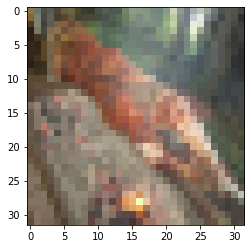

In [17]:
s = 6
image = torch.tensor(x_test[s]) #34
print(y_test[s])
plt.imshow(image.permute(1, 2, 0))

# Average Calculations - 32

In [24]:
from torch.utils.data import DataLoader

image_data_loader = DataLoader(
  dat_test, 
  # batch size is whole datset
  batch_size=len(dat_test), 
  shuffle=False, 
  num_workers=0)

def mean_std(loader):
  images, labels = next(iter(loader))
  # shape of images = [b,c,w,h]
  mean, std = images.mean([0,2,3]), images.std([0,2,3])
  return mean, std

mean1, std1 = mean_std(image_data_loader)
print("mean and std: \n", mean1, std1)

mean and std: 
 tensor([0.4656, 0.4361, 0.4225]) tensor([0.2732, 0.2491, 0.2550])


In [14]:
# Approach for BATCHES
import torch
from torch.utils.data import DataLoader

batch_size = 100

loader = DataLoader(
  dat_test, 
  batch_size = batch_size, 
  num_workers=1)

def batch_mean_and_sd(loader):
    
    cnt = 0
    fst_moment = torch.empty(3)
    snd_moment = torch.empty(3)

    for images, _ in loader:
        b, c, h, w = images.shape
        nb_pixels = b * h * w
        sum_ = torch.sum(images, dim=[0, 2, 3])
        sum_of_square = torch.sum(images ** 2,
                                  dim=[0, 2, 3])
        fst_moment = (cnt * fst_moment + sum_) / (cnt + nb_pixels)
        snd_moment = (cnt * snd_moment + sum_of_square) / (cnt + nb_pixels)
        cnt += nb_pixels

    mean, std = fst_moment, torch.sqrt(snd_moment - fst_moment ** 2)        
    return mean,std
  
mean2, std2 = batch_mean_and_sd(loader)
print("mean and std: \n", mean2, std2)

mean and std: 
 tensor([0.4656, 0.4361, 0.4225]) tensor([0.2732, 0.2491, 0.2550])


In [17]:
transform=transforms.Compose([
    transforms.ToTensor(),
	transforms.Normalize(
        mean = mean1,
        std = std1)
    ]
)

In [18]:
torch.mean(transform(x_test[10]))

tensor(-0.0016)

In [19]:
means= []
for i in np.arange(0,len(x_test),1):
    means.append(torch.mean(transform(x_test[i])))

In [20]:
np.mean(means)

-0.00021054603

# Average Calculations - 64

In [25]:
x_test,y_test = load_data_test('/Users/dj/Desktop/MT_Desktop/ImageNet/ImageNet64/val_data', im_size = 64)
print(type(x_test))
print(type(y_test))
dat_test = create_tuples(x_test, y_test, im_size = 64)
print(type(dat_test))

<class 'numpy.ndarray'>
<class 'list'>
<class 'list'>


In [26]:
from torch.utils.data import DataLoader

image_data_loader = DataLoader(
  dat_test, 
  # batch size is whole datset
  batch_size=len(dat_test), 
  shuffle=False, 
  num_workers=0)

def mean_std(loader):
  images, labels = next(iter(loader))
  # shape of images = [b,c,w,h]
  mean, std = images.mean([0,2,3]), images.std([0,2,3])
  return mean, std

mean1, std1 = mean_std(image_data_loader)
print("mean and std: \n", mean1, std1)

mean and std: 
 tensor([0.4660, 0.4363, 0.4231]) tensor([0.2806, 0.2582, 0.2627])


In [62]:
for images, _ in dat_test:
    print(images.shape)
    print(_)
    break

torch.Size([3, 32, 32])
371


In [63]:
for images, _ in loader:
    b, c, h, w = images.shape
    print(b)
    print(c)
    print(h)
    print(w)
    break

64
3
32
32


[W ParallelNative.cpp:229] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)


In [4]:
# Create both datasets
batch_size = 100
train = '/Users/dj/Desktop/MT_Desktop/ImageNet/Imagenet32_train/'
test = '/Users/dj/Desktop/MT_Desktop/ImageNet/val_data'
trainset, testset = create_imnet_train_test(path_train= train, path_test=test)

/opt/anaconda3/envs/MasterThesis/lib/python3.7/site-packages/ipykernel_launcher.py:82: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
/opt/anaconda3/envs/MasterThesis/lib/python3.7/site-packages/ipykernel_launcher.py:82: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [11]:
from torch.utils.data import DataLoader

def mean_std(loader):
  images, labels = next(iter(loader))
  # shape of images = [b,c,w,h]
  mean, std = images.mean([0,2,3]), images.std([0,2,3])
  return mean, std

mean1, std1 = mean_std(testset)
print("mean and std: \n", mean1, std1)

mean and std: 
 tensor([0.4578, 0.4381, 0.4403]) tensor([0.2750, 0.2450, 0.2628])


In [8]:
for data in testset:
    x,y = data
    print(x)
    break

tensor([[[[-0.1683,  0.0900,  0.1331,  ..., -0.1253, -0.1109, -0.1396],
          [-0.2832,  0.0326,  0.0900,  ..., -0.0966, -0.0966, -0.0679],
          [-0.4985, -0.1396,  0.0183,  ..., -0.0248, -0.0104, -0.0104],
          ...,
          [-0.8430, -0.8143, -0.8143,  ..., -0.8861, -0.8430, -0.8430],
          [-0.8861, -0.9004, -0.8861,  ..., -1.0009, -1.0152, -1.0583],
          [-1.1731, -1.1157, -1.0583,  ..., -1.0296, -1.0440, -1.0152]],

         [[-0.3653, -0.1449, -0.0977,  ..., -0.1607, -0.1449, -0.1449],
          [-0.4598, -0.1764, -0.0819,  ..., -0.1607, -0.1449, -0.1292],
          [-0.6487, -0.3181, -0.1764,  ..., -0.1134, -0.0977, -0.0819],
          ...,
          [-1.0423, -1.0265, -1.0108,  ..., -0.9950, -0.9636, -0.9478],
          [-1.0738, -1.1052, -1.0738,  ..., -1.0895, -1.1210, -1.1525],
          [-1.1367, -1.1840, -1.1840,  ..., -1.1052, -1.1210, -1.1052]],

         [[-0.7649, -0.5496, -0.5035,  ..., -0.3804, -0.3343, -0.3343],
          [-0.8110, -0.5496, -

In [8]:
transform=transforms.Compose([
    transforms.ToTensor(),
	transforms.Normalize(
        mean = [0.4656, 0.4361, 0.4225],
        std = [0.2732, 0.2491, 0.2550])
    ]
)

In [14]:
test = np.array([transform(i) for i in x_test])

/opt/anaconda3/envs/MasterThesis/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  """Entry point for launching an IPython kernel.
/opt/anaconda3/envs/MasterThesis/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [16]:
test[0]

tensor([[[-0.1683,  0.0900,  0.1331,  ..., -0.1253, -0.1109, -0.1396],
         [-0.2832,  0.0326,  0.0900,  ..., -0.0966, -0.0966, -0.0679],
         [-0.4985, -0.1396,  0.0183,  ..., -0.0248, -0.0104, -0.0104],
         ...,
         [-0.8430, -0.8143, -0.8143,  ..., -0.8861, -0.8430, -0.8430],
         [-0.8861, -0.9004, -0.8861,  ..., -1.0009, -1.0152, -1.0583],
         [-1.1731, -1.1157, -1.0583,  ..., -1.0296, -1.0440, -1.0152]],

        [[-0.3653, -0.1449, -0.0977,  ..., -0.1607, -0.1449, -0.1449],
         [-0.4598, -0.1764, -0.0819,  ..., -0.1607, -0.1449, -0.1292],
         [-0.6487, -0.3181, -0.1764,  ..., -0.1134, -0.0977, -0.0819],
         ...,
         [-1.0423, -1.0265, -1.0108,  ..., -0.9950, -0.9636, -0.9478],
         [-1.0738, -1.1052, -1.0738,  ..., -1.0895, -1.1210, -1.1525],
         [-1.1367, -1.1840, -1.1840,  ..., -1.1052, -1.1210, -1.1052]],

        [[-0.7649, -0.5496, -0.5035,  ..., -0.3804, -0.3343, -0.3343],
         [-0.8110, -0.5496, -0.4881,  ..., -0

In [17]:
transform(x_test[0])

tensor([[[-0.1683,  0.0900,  0.1331,  ..., -0.1253, -0.1109, -0.1396],
         [-0.2832,  0.0326,  0.0900,  ..., -0.0966, -0.0966, -0.0679],
         [-0.4985, -0.1396,  0.0183,  ..., -0.0248, -0.0104, -0.0104],
         ...,
         [-0.8430, -0.8143, -0.8143,  ..., -0.8861, -0.8430, -0.8430],
         [-0.8861, -0.9004, -0.8861,  ..., -1.0009, -1.0152, -1.0583],
         [-1.1731, -1.1157, -1.0583,  ..., -1.0296, -1.0440, -1.0152]],

        [[-0.3653, -0.1449, -0.0977,  ..., -0.1607, -0.1449, -0.1449],
         [-0.4598, -0.1764, -0.0819,  ..., -0.1607, -0.1449, -0.1292],
         [-0.6487, -0.3181, -0.1764,  ..., -0.1134, -0.0977, -0.0819],
         ...,
         [-1.0423, -1.0265, -1.0108,  ..., -0.9950, -0.9636, -0.9478],
         [-1.0738, -1.1052, -1.0738,  ..., -1.0895, -1.1210, -1.1525],
         [-1.1367, -1.1840, -1.1840,  ..., -1.1052, -1.1210, -1.1052]],

        [[-0.7649, -0.5496, -0.5035,  ..., -0.3804, -0.3343, -0.3343],
         [-0.8110, -0.5496, -0.4881,  ..., -0

In [ ]:
    # # Normalization.
    # mrgb = [0.4656, 0.4361, 0.4225]
    # srgb = [0.2732, 0.2491, 0.2550]
    # normalize = transforms.Normalize(mean=mrgb, std=srgb)

    # # Train loader.
    # train_data = datasets.ImageFolder(basedir + "train/", transform=transforms.Compose(
    #     [transforms.RandomResizedCrop(224), transforms.RandomHorizontalFlip(), transforms.ToTensor(), normalize]))

    # trainloader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True, **kwargs)

    # # Test loader.
    # test_data = datasets.ImageFolder(basedir + "test/", transform=transforms.Compose(
    #     [transforms.RandomResizedCrop(224), transforms.ToTensor(), normalize]))

    # testloader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False, **kwargs)